# SPAM Mail Classification - Using Naive Bayes Algorithm
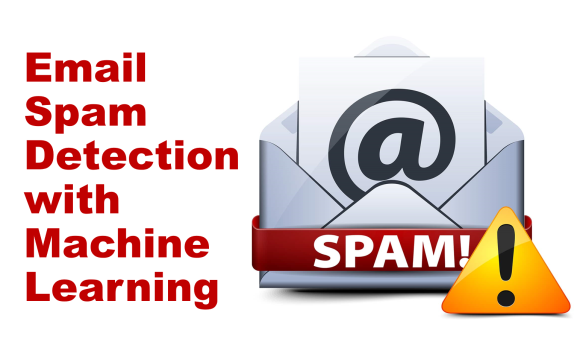

# The Naive Bayes Classifier Formula

One of the most simple yet powerful classifier algorithms, Naive Bayes is based on Bayes’ Theorem Formula with an assumption of independence among predictors. Given a Hypothesis A and evidence B, Bayes’ Theorem calculator states that the relationship between the probability of Hypothesis before getting the evidence P(A) and the probability of the hypothesis after getting the evidence 
P(A|B) is: 
               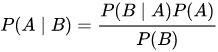
               
Here:

* A, B = events
* P(A|B) = probability of A given B is true
* P(B|A) = probability of B given A is true
* P(A), P(B) = the independent probabilities of A and B


# Detecting Email Spam

Modern spam filtering software continuously struggles to categorise the emails correctly. Unwanted spam & promotional communication is the toughest of them all. Spam communication algorithms must be iterated continuously since there is an ongoing battle between spam filtering software and anonymous spam & promotional mail senders. Naive Bayes Algorithm in data analytics forms the base for text filtering in Gmail, Yahoo Mail, Hotmail & all other platforms.

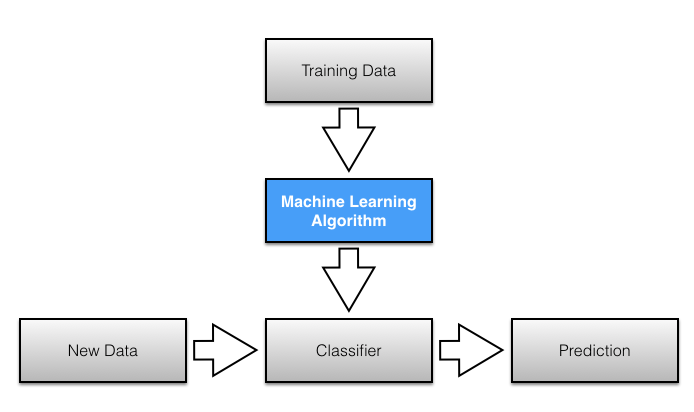

## Load Dataset 
Dataset is available on kaggle . you can download using this link -

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset 


In [6]:
import pandas as pd 
data= pd.read_csv("spam.csv")
data.head() 

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Show all Columns**

In [7]:
data.columns 

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

**Drop Un-necessary Columns Our Dataset**

In [8]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
data

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Convert text data to numeric  

In [10]:
data['class']=data['class'].map({'ham':0,'spam':1})  #create a dictionary for convert text data to int

In [11]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Text Pre-Processing 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [13]:
cv=CountVectorizer()

In [14]:
x=data['message']
y=data['class'] 

In [15]:
x.shape

(5572,)

In [16]:
y.shape 


(5572,)

In [17]:
x=cv.fit_transform(x)

In [18]:
x

<5572x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 73734 stored elements in Compressed Sparse Row format>

# Train a model  

In [19]:
from sklearn.model_selection import train_test_split 


In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)

In [21]:
x_train

<4457x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 59073 stored elements in Compressed Sparse Row format>

# Naive-Bayes Algorithm

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model=MultinomialNB()

In [24]:
model.fit(x_train,y_train)

MultinomialNB()

**Accuracy**

In [25]:
result=model.score(x_test,y_test) 
result

0.9811659192825112

# 

In [26]:
result=result*100 

In [27]:
result

98.11659192825111

**Save the model**

In [28]:
import pickle 
# pickle.dump(model,open("spam.pkl","wb")) 

In [29]:
pickle.dump(cv,open("vectorized.pkl","wb")) 

In [26]:
clf=pickle.load(open("spam.pkl","rb")) 

In [27]:
clf 

MultinomialNB()

**Make Prediction**

In [28]:
msg="are you at class yet" 
data=[msg] 
vect=cv.transform(data).toarray()
result=model.predict(vect) 
print(result)

[0]


# Deploy model on streamlit 

In [1]:
%%writefile spam.py 
import streamlit as st
import pickle  
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 


from win32com.client import Dispatch

def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)


model = pickle.load(open('spam.pkl','rb'))
cv=pickle.load(open('vectorizer.pkl','rb'))


def main():
	st.title("Email Spam Classification Application")
	st.write("Build with Streamlit & Python")
	activites=["Classification","About"]
	choices=st.sidebar.selectbox("Select Activities",activites)
	if choices=="Classification":
		st.subheader("Classification")
		msg=st.text_input("Enter a text")
		if st.button("Process"):
			print(msg)
			print(type(msg))
			data=[msg]
			print(data)
			vec=cv.transform(data).toarray()
			result=model.predict(vec)
			if result[0]==0:
				st.success("This is Not A Spam Email")
				speak("This is Not A Spam Email")
			else:
				st.error("This is A Spam Email")
				speak("This is A Spam Email")
main() 



Writing spam.py


In [2]:
!streamlit run spam.py 

^C


**ThankYou So Much.....!**

**download our code here ----**

https://github.com/datamind321/Oasis-Infobyte/

**Happy Coding (^_^)**